In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf

In [2]:
path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/Spectrometer/JTS/"

fig_folder = path + "Figures/"
if not os.path.exists(fig_folder):
    os.makedirs(fig_folder)

actinique_rouge = pd.read_csv(path + "actinique_rouge" + ".csv", delimiter=";", decimal=".")
filter_695 = pd.read_csv(path + "white_filtre_695" + ".csv", delimiter=";", decimal=".")
filter_fluo = pd.read_csv(path + "white_filtre_fluo" + ".csv", delimiter=";", decimal=".")

def normalize_spectra(spectra):
    spectra_baseline = np.mean(spectra["intensity"][tools.closest_index(spectra["wavelength"], 300):tools.closest_index(spectra["wavelength"], 400)])
    spectra["intensity"] = spectra["intensity"] - spectra_baseline
    #spectra["intensity"] = spectra["intensity"] / np.trapz(spectra["intensity"], spectra["wavelength"])
    spectra["intensity"] = spectra["intensity"] / np.max(spectra["intensity"])
    return spectra

actinique_rouge = normalize_spectra(actinique_rouge)
filter_695 = normalize_spectra(filter_695)
filter_fluo = normalize_spectra(filter_fluo)

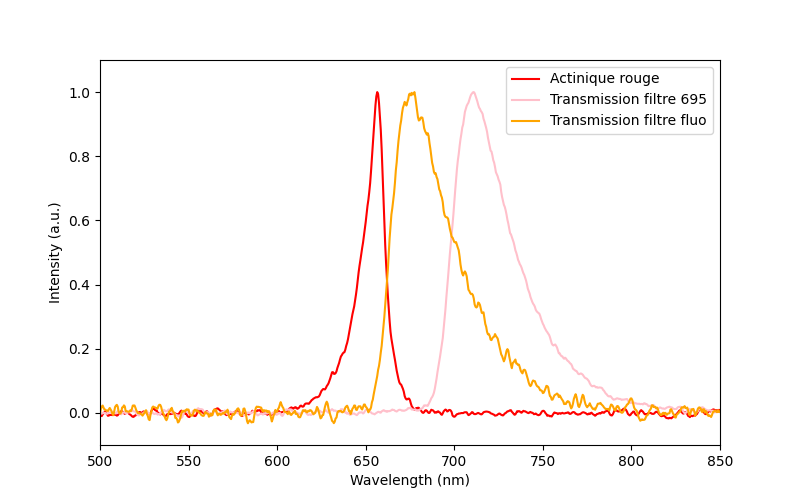

In [4]:

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(actinique_rouge["wavelength"], actinique_rouge["intensity"], label="Actinique rouge", color = "red")
ax.plot(filter_695["wavelength"], filter_695["intensity"], label="Transmission filtre 695", color = "pink")
ax.plot(filter_fluo["wavelength"], filter_fluo["intensity"], label="Transmission filtre fluo", color = "orange")
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Intensity (a.u.)")
ax.legend()
ax.set_xlim(500, 850)
ax.set_ylim(-0.1, 1.1)
fig.savefig(fig_folder + "spectra_filters.png", dpi=300)